In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import to_categorical , plot_model
from keras.datasets import mnist 

In [155]:
(x_train , y_train ) , (x_test , y_test ) = mnist.load_data()

In [156]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

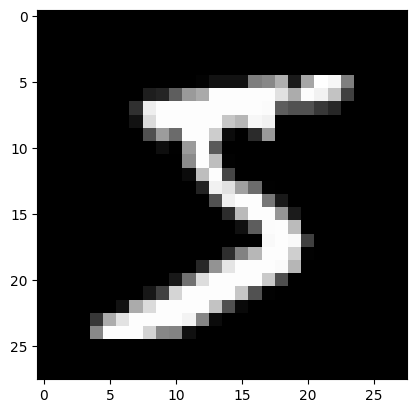

In [157]:
plt.imshow(x_train[0] , cmap='gray')

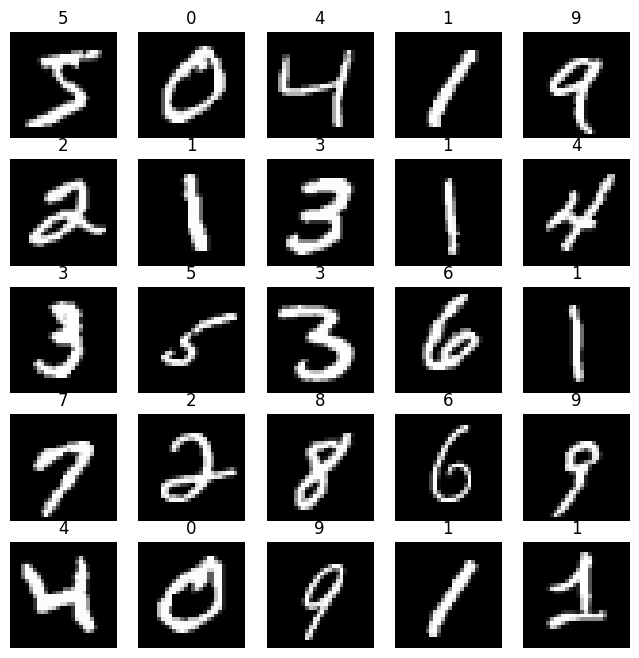

In [158]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i] , cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

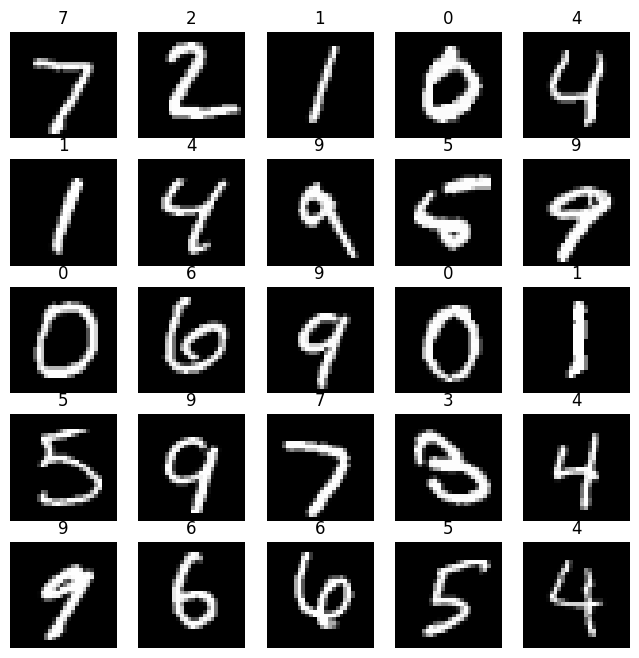

In [159]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i] , cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

### Data Preprocessing

In [160]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalize

In [161]:
x_train = x_train / 255
x_test = x_test / 255

#### Convert 2D data to 1D

In [162]:
x_train[0].shape

(28, 28)

In [163]:
x_train[0].size

784

In [164]:
m = np.array([[6,3,1],[8,9,7]])

In [165]:
m

array([[6, 3, 1],
       [8, 9, 7]])

In [166]:
m.flatten()

array([6, 3, 1, 8, 9, 7])

In [167]:
m.reshape(m.size)

array([6, 3, 1, 8, 9, 7])

In [168]:
np.reshape(m , m.size)

array([6, 3, 1, 8, 9, 7])

In [169]:
x_train = x_train.reshape(-1 , x_train[0].size )  #-1 is used to automatic change previous pixel
x_test = x_test.reshape(-1 , x_test[0].size )

In [170]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

### Prepare the output variable

<Axes: xlabel='count'>

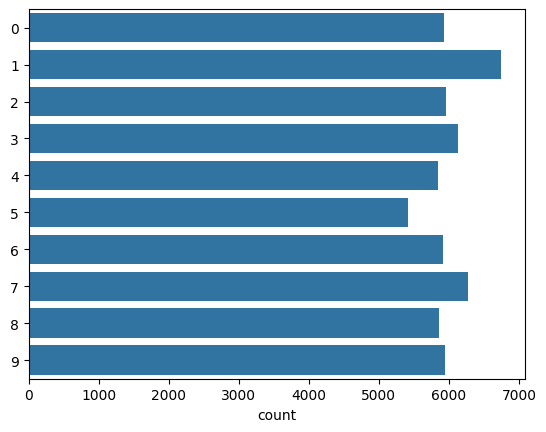

In [171]:
sns.countplot(y= y_train)

<Axes: xlabel='count'>

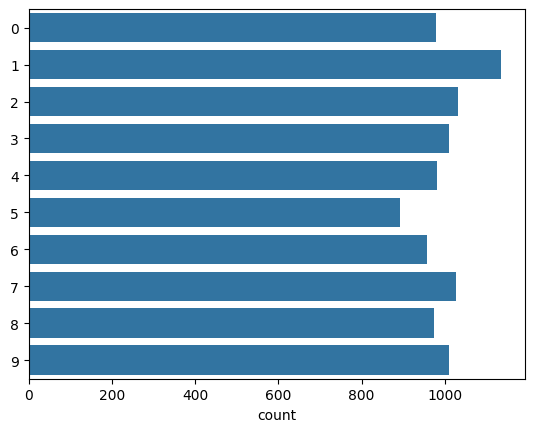

In [172]:
sns.countplot(y= y_test)

In [173]:
y_train.shape

(60000,)

In [174]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [175]:
y_train.shape

(60000, 10)

In [176]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Build the model

In [177]:
model = Sequential()
#Input Layer
model.add(Dense(512 , input_shape = (784,) , activation='relu'))
#Hidden Layer
model.add(Dense(128 , activation="relu"))
#Output Layer
model.add(Dense(10 , activation='softmax'))

In [178]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
#plot_model(model , show_layer_activations=True , show_layer_names=True , show_shapes=True)

### Compile the model

In [180]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])

### Build the model

In [181]:
history = model.fit(x_train , y_train , epochs=10 , batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.1880 - accuracy: 0.9427
Epoch 2/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 3/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0619 - accuracy: 0.9807
Epoch 4/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0484 - accuracy: 0.9855
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0412 - accuracy: 0.9882
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0358 - accuracy: 0.9895
Epoch 7/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 8/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 9/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0261 - accuracy: 0.9923
Epoch 10/10
6000/6000 [==============================] - 23s 4ms/step - l

### Evaluate the model 


In [182]:
model.evaluate(x_test , y_test , batch_size=1)

10000/10000 [==============================] - 23s 2ms/step - loss: 0.1117 - accuracy: 0.9790


[0.11172712594270706, 0.9789999723434448]

### Predict on new image

In [183]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [184]:
new = x_test[1234]

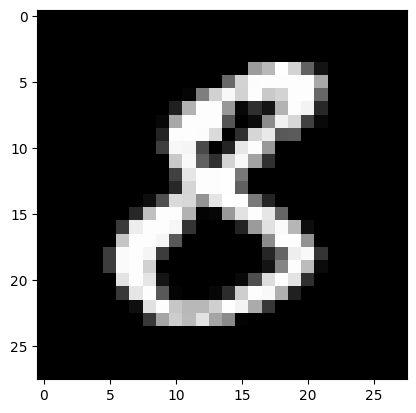

In [185]:
plt.imshow(new , cmap='gray')

In [187]:
new = new/255
new = new.reshape(1,784)

In [189]:
result = model.predict(new)

1/1 [==============================] - 0s 44ms/step


In [190]:
np.argmax(result)

8

### Predict on image

In [249]:
import cv2

In [250]:
img = cv2.imread("img.jpg" , 0)

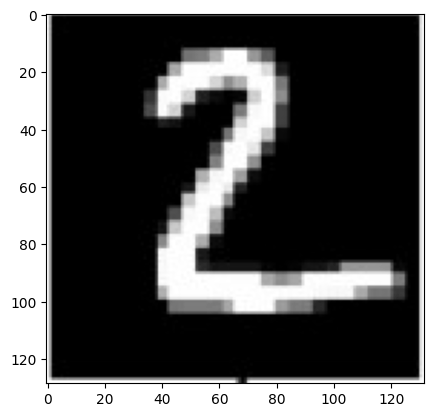

In [251]:
plt.imshow(img , cmap="gray")

In [252]:
img = cv2.resize(img, (28, 28))

In [253]:
img = img/255
img = img.reshape(1,784)
result = model.predict(img)
np.argmax(result)

1/1 [==============================] - 0s 33ms/step


2